In [158]:
import json
import pandas as pd    

def parse_json_to_pandas(cap: int):
    lst_for_df = []

    for file_num in range(cap):
        file = f'1_{file_num:012d}_keypoints.json'
        # file = f'1_00000000000{file_num}_keypoints'
        with open(file) as train_file:
            dict_train = json.load(train_file)
        
        keypoints = dict_train['people'][0]['pose_keypoints_2d']

        new_keypoints = []

        for i in range(0, len(keypoints), 3):
            # new_keypoints.append([keypoints[i], keypoints[i+1]]))
            new_keypoints.append(keypoints[i])
            new_keypoints.append(keypoints[i+1])

        lst_for_df.append(new_keypoints)

    df = pd.DataFrame(lst_for_df)
    return df

df = parse_json_to_pandas(212)
df

# file = f'1_{0:012d}_keypoints.json'
# # file = f'1_00000000000{file_num}_keypoints'
# with open(file) as train_file:
#     dict_train = json.load(train_file)

# keypoints = dict_train['people'][0]['pose_keypoints_2d']
# print(keypoints)
# print()

# length = len(keypoints)

# new_keypoints = []

# for i in range(0, length, 3):
#     new_keypoints.append((keypoints[i], keypoints[i+1]))
    
# print(new_keypoints)
# print()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,337.001,107.1410,340.903,130.581,319.370,130.616,316.425,164.851,320.388,195.182,362.429,129.619,374.191,160.947,365.359,192.229,341.902,195.175,329.178,196.130,325.284,252.848,334.047,290.028,355.593,195.144,355.582,246.979,356.556,292.016,332.146,104.1670,340.940,103.2200,327.213,106.1330,348.747,105.1900,353.601,307.676,360.498,306.653,355.578,294.922,334.067,308.640,327.235,306.677,337.957,291.038
1,338.975,107.1060,341.870,129.617,320.369,129.652,316.455,164.830,321.373,194.192,362.462,128.677,374.155,160.942,366.340,192.211,342.887,195.142,331.103,195.169,330.120,250.930,336.978,290.026,356.539,194.193,356.536,246.017,356.534,292.019,334.081,103.2290,342.883,103.1840,329.175,106.1410,350.672,105.1720,353.640,308.614,361.462,306.673,354.593,294.930,337.987,308.602,331.142,306.659,339.926,291.041
2,339.956,107.1190,341.885,129.621,321.337,130.575,316.480,164.834,322.330,195.150,363.377,128.662,372.221,159.932,368.314,192.202,343.835,195.157,331.136,196.123,331.143,250.932,338.984,290.056,356.563,194.200,356.597,245.042,355.621,292.962,335.997,104.1510,344.803,103.2040,330.157,106.1330,350.721,105.1780,352.646,308.604,360.485,306.681,354.618,295.919,338.964,307.657,333.076,305.689,341.915,292.960
3,340.885,108.0850,341.872,130.601,321.325,131.573,317.411,165.823,320.399,196.128,363.378,129.633,371.254,163.839,368.294,193.218,343.841,197.103,331.146,197.132,332.138,249.940,339.904,291.972,356.562,196.163,357.532,245.044,356.536,292.015,336.006,104.2090,344.807,104.1620,330.153,107.1020,350.712,105.2010,353.611,307.659,360.502,305.719,354.618,295.899,339.948,307.629,333.114,305.691,341.899,293.966
4,339.966,108.1020,341.872,133.526,321.337,133.525,317.407,166.810,320.396,198.074,363.394,132.576,370.260,166.768,367.308,194.196,343.843,198.111,331.160,199.064,333.120,249.942,339.943,293.975,356.550,198.088,357.543,247.017,355.586,292.996,336.001,104.2150,344.800,104.1880,330.179,107.1380,350.715,106.1680,353.635,308.611,360.463,306.687,353.629,296.904,338.948,307.652,333.058,305.712,342.871,297.891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,334.068,83.6512,337.019,107.144,319.377,108.092,300.796,112.988,301.762,108.124,355.579,107.105,368.300,111.042,372.207,111.035,336.021,170.701,322.336,169.748,293.968,216.698,300.771,253.826,348.779,170.726,356.554,225.465,359.494,272.463,330.144,80.6818,338.928,79.7519,325.233,83.6816,346.780,82.6837,363.403,290.022,369.291,287.101,355.602,277.340,293.008,274.423,289.084,271.470,302.789,253.874
208,332.116,85.6041,334.045,109.069,313.548,107.157,305.715,127.653,296.902,122.795,353.626,110.040,371.230,135.476,374.196,125.695,334.097,170.697,321.330,169.742,301.778,217.683,301.805,260.702,348.717,170.726,357.556,224.486,359.481,271.464,327.231,81.7025,336.015,81.6825,322.321,84.6494,343.836,83.6299,362.436,289.061,369.256,286.148,355.577,275.376,295.929,281.257,291.981,278.318,305.717,262.637
209,332.119,88.5039,330.146,105.150,310.611,104.217,293.993,125.716,302.768,143.302,347.790,105.139,364.395,118.877,371.252,139.412,333.052,168.744,319.388,168.755,306.698,221.597,305.720,264.634,345.814,168.735,362.446,220.608,361.452,267.540,327.238,82.6877,335.067,82.6894,318.453,83.6290,341.902,83.6612,363.386,288.100,369.265,286.108,356.561,269.525,297.882,283.218,293.938,279.313,309.591,267.540
210,323.269,88.5074,325.277,105.189,306.683,105.177,288.090,126.672,287.126,137.452,343.824,105.186,362.427,128.635,371.259,155.087,330.149,172.650,316.492,172.676,308.622,223.510,308.639,268.521,341.916,171.687,367.331,215.728,363.442,261.689,319.402,83.6271,326.224,83.6243,314.491,82.6560,334.057,83.6327,361.429,283.205,368.287,281.251,360.487,263.652,296.922,282.244,294.921,278.336,312.543,272.449


In [40]:
!pip install dtaidistance

     |████████████████████████████████| 1.1 MB 5.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for dtaidistance: filename=dtaidistance-2.3.2-cp37-cp37m-linux_x86_64.whl size=1586305 sha256=f9b5a6f8a15aa892bd92228794f84dd589c77b29e5b3507ad8a2e8c8ce73e172
  Stored in directory: /root/.cache/pip/wheels/5e/4a/9a/30f9efb3926e3c2f28231680685b36d0041466a33e4b8f8367
Successfully built dtaidistance


In [153]:
a = np.array(df.iloc[0])
print(a.shape[0])

def normalize(arr, shape):
    for i in range(0, len(arr), 2):
        arr[i] = arr[i] / shape[0]
        arr[i+1] = arr[i+1] / shape[1]
    return arr

50


In [242]:
import numpy as np

from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

def compare_poses(df, pose_1: int, pose_2:int, video_shape=(1, 1)):
    a = np.array(df.iloc[pose_1])
    b = np.array(df.iloc[pose_2])

    shape = np.array(video_shape)
    a = normalize(a, shape)
    b = normalize(b, shape)

    # print(np.linalg.norm(a))
    # print()
    # print(np.linalg.norm(b))

    # a = a / np.linalg.norm(a) 
    # b = b / np.linalg.norm(b)

    # print(a)
    # print()
    # print(b)

    # a = np.divide(a, shape).ravel()
    # b = np.divide(b, shape).ravel()

    path = dtw.warping_path(a, b)
    dtwvis.plot_warping(a, b, path)
    distance = dtw.distance(a, b)
    equalty = 1 - np.abs(np.sum(a - b) / (a.shape[0] / 2))
    print(f"Distance: {distance:03f}")
    print(f"Equalty:  {(equalty * 100):03f}%")
    return equalty

Distance: 0.018181
Equalty:  99.872737%


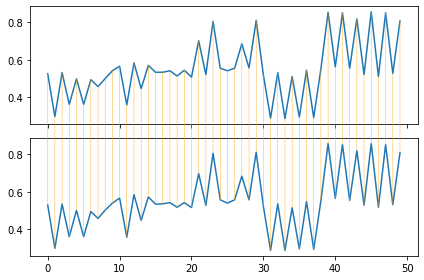

In [246]:
eq = compare_poses(df, 0, 1, (640, 360))

Distance: 2.837275
Equalty:  31.654176%


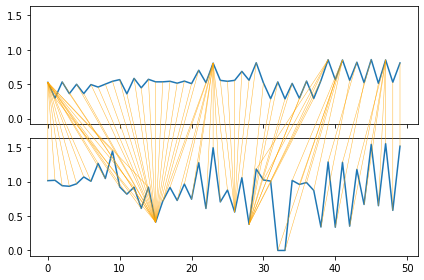

In [247]:
eq = compare_poses(df, 0, 211, (640, 360))

In [160]:
from sklearn.metrics.pairwise import cosine_similarity

# def cosin_sim(df, pose_1: int, pose_2:int)

a = np.array(df.iloc[0]) / np.linalg.norm(np.array(df.iloc[0]))
b = np.array(df.iloc[211]) / np.linalg.norm(np.array(df.iloc[211]))

# a = np.linalg.norm(normalize(np.array(df.iloc[0]), (640, 360)))
# b = np.linalg.norm(normalize(np.array(df.iloc[210]), (640, 360)))
print(a)
print(b)

a = a.reshape(1, -1)
b = b.reshape(1, -1)


# a = normalize(np.array(df.iloc[0]), (640, 360)).reshape(1, -1)
# a = np.linalg.norm(a)
# b = normalize(np.array(df.iloc[1]), (640, 360)).reshape(1, -1)
# b = np.linalg.norm(b)
cosine_similarity(a, b)

[0.16593438 0.05275467 0.16785567 0.06429618 0.15725313 0.06431342
 0.15580306 0.08117023 0.15775438 0.09610477 0.17845476 0.06382251
 0.1842462  0.07924796 0.17989745 0.09465076 0.16834756 0.09610133
 0.16208245 0.09657155 0.1601651  0.12449867 0.16447988 0.14280556
 0.17508881 0.09608606 0.1750834  0.12160886 0.17556298 0.14378442
 0.16354385 0.05129031 0.16787389 0.05082402 0.16111491 0.05225834
 0.17171794 0.05179402 0.17410798 0.15149518 0.17750396 0.15099147
 0.17508143 0.1452153  0.16448972 0.15196984 0.16112575 0.15100329
 0.1664051  0.14330287]
[0.20304568 0.11478392 0.18836172 0.10497668 0.19385107 0.1202883
 0.2012162  0.14237994 0.20919742 0.1625811  0.18527411 0.09212126
 0.184077   0.06882029 0.18407261 0.04614855 0.14359145 0.10315409
 0.14543281 0.10864845 0.14910365 0.14359083 0.12212653 0.16812771
 0.14115216 0.09884058 0.11170977 0.11905582 0.07615726 0.13317908
 0.20491801 0.11355364 0.         0.         0.20367271 0.10804207
 0.19753098 0.09822262 0.06821266 0.144

array([[0.93406376]])

In [237]:
import matplotlib.pyplot as plt

def cosin_sim(df, pose_1: int, pose_2:int):
    a = np.array(df.iloc[pose_1]).reshape(25, 2)
    a = a / np.linalg.norm(a)
    x = a[:, 0]
    y = a[:, 1]
    # print(x)
    # print(y)
    # print()
    plt.scatter(x, y)
    plt.axis([0, 1, 0, 1])

    b = np.array(df.iloc[pose_2]).reshape(25, 2)
    b = b / np.linalg.norm(b)
    x = b[:, 0]
    y = b[:, 1]
    # print(x)
    # print(y)
    plt.scatter(x, y)
    plt.axis([0, 0.25, 0, 0.25])

    # print(np.sqrt(np.dot(a[0], b[0])))

    return (cosine_similarity(a.reshape(1, -1), b.reshape(1, -1))[0][0] - 0.9) * 10

# a = np.array(df.iloc[0]).reshape(25, 2)
# a = a / np.linalg.norm(a)
# x = a[:, 0]
# y = a[:, 1]
# print(x)
# print(y)
# print()
# plt.scatter(x, y)
# plt.axis([0, 1, 0, 1])

# b = np.array(df.iloc[211]).reshape(25, 2)
# b = b / np.linalg.norm(b)
# x = b[:, 0]
# y = b[:, 1]
# print(x)
# print(y)
# plt.scatter(x, y)
# plt.axis([0, 0.5, 0, 0.5])

# cosine_similarity(a.reshape(1, -1), b.reshape(1, -1))

# for i, j in zip(x, y):
#     plt.text(i, j, f'({i:03f}, {j:03f})')

0.9999004249509813


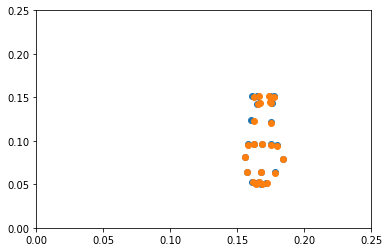

In [241]:
print(cosin_sim(df, 0, 1))

0.34063758497049457


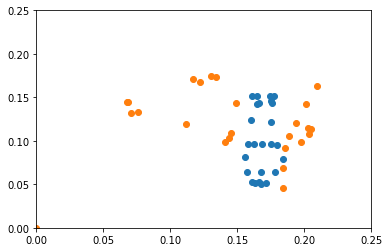

In [239]:
print(cosin_sim(df, 0, 211))